# 분류

머신러닝의 학습 방법은 크게 지도 학습(supervised learning)과 비지도 학습(unsupervised learning)으로 나눌 수 있다. 
- 지도 학습 : 라벨링이 된 데이터를 학습시키는 것을 의미
- 비지도 학습 : 라벨링이 되지 않은 데이터를 학습 시키는 것을 의미

(여기서 라벨링이란 학습시킬 데이터(train data)에 각각에 맞추고 싶은 정답(target data)이 표시된 것을 의미한다.)

지도학습은 target data의 형태에 따라 분류(classification)와 회귀(regression)로 나눌 수 있다.
- 분류 : target data가 categorical/discrete 형태인 경우, 데이터가 속한 그룹을 찾아내는 것을 의미
- 회귀 : target data가 continuous 형태인 경우, feature variable과 target variable의 관계를 찾아내는 것을 의미

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbblCkC%2FbtqEq8rEkUa%2FLM1DLkUgBku9ApbkTYX90K%2Fimg.png' width='600' height='300'/>

# KNN Classifier

k-NN(k-Nearest Neighbors) 알고리즘은 가장 간단한 분류 머신러닝 알고리즘이다. 1) 임의의 k를 정해, 2) 예측할 데이터를 기준으로 가장 가까운 k개의 요소(이웃)의 분류 클래스를 기준으로 3) 더 많은 이웃이 있는 클래스로 분류한다. 

# SVM

### 로지스틱 회귀 비용함수

지난 시간에 배운 로지스틱 회귀의 비용 곡선을 잠깐 다뤄보도록 하겠다.

$$Cost(h_{\theta}(x), y) = \begin{cases} -\log(h_{\theta}(x)) \qquad \; \,  (y=1)\\ -\log(1-h_{\theta}(x)) \quad (y=0)\\ \end{cases}$$

$y = 1$인 경우에, $h_{\theta}(x)=1$이면 비용은 0에 가깝지만, $h_{\theta}(x)=0$이면 비용은 무한대이다. (반대도 마찬가지다.) 아래 비용함수를 그려보도록 하겠다.

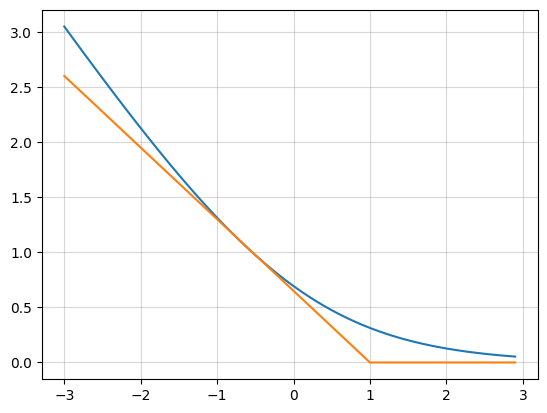

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 3, 0.1)

plt.plot(x, -np.log(1/(1+np.exp(-x))))
plt.plot(x, np.piecewise(x, [x < 1, x >= 1], [lambda x: ((-2.6/4)*x)+0.65, lambda x: 0]))
plt.grid(alpha=0.5)
plt.show()

SVM(Support Vector Machine)에서 비용 곡선은 다음 주황색 함수를 사용할 것이다.(log를 사용하지 않고 직선의 함수다.) 1을 기준으로 1보다 크면 비용이 0이고, 1을 기준으로 1보다 작은 구간에서는 기울기가 음(-)인 직선을 그린다. (기울기의 크기는 중요하지 않다.) 이렇게 로지스틱 회귀의 비용함수와 유사한 직선을 새롭게 만들어, 더 쉽게 최적화를 진행하려고 한다. (piecewise-linear한 비용함수를 hinge loss function이라고 부른다.)
이 때, $y=1$일 때의 cost를 $cost_{1}(z)$라고 표현하고, $y=0$일 때의 cost를 $cost_{0}(z)$라고 표현한다.

### SVM 비용함수

따라서 로지스틱 회귀의 비용 함수에서 새롭게 정의한 $cost_{1}(z)$, $cost_{0}(z)$을 대입해서 새롭게 SVM 비용 함수를 정의한다.

$$ \min_{\theta} \frac{1}{m} \Bigg[ \sum_{i=1}^{m} y^{i} (-\log h_{\theta}(x^{i})) + (1-y^{i}) \big(-\log (1-h_{\theta}(x^{i})) \big) \Bigg] + \frac{\lambda}{2m}\sum_{i=1}^{n}\theta_{j}^{2}$$

$$ \min_{\theta} \frac{1}{\lambda} \Bigg[ \sum_{i=1}^{m} y^{i} cost_{1}(\theta^{T}x^{i}) + (1-y^{i}) cost_{0}(\theta^{T}x^{i}) \Bigg] + \frac{1}{2}\sum_{i=1}^{n}\theta_{j}^{2}$$



### SVM 가설함수

SVM의 가설함수는 다음과 같다.

$$h_{\theta}(x) = \begin{cases} 1 \quad  (\mathrm{if} \; \, \theta^{T}x^{i} > 0) \\ 0 \quad (\mathrm{if} \; \, \theta^{T}x^{i} < 0)\\ \end{cases}$$

y가 1이거나 0일 확률로 계산하지 않으며, 가설 함수의 결과 값은 0 또는 1로 명확하다.

# 군집

머신러닝의 학습 방법은 크게 지도 학습(supervised learning)과 비지도 학습(unsupervised learning)으로 나눌 수 있다. 
- 지도 학습 : 라벨링이 된 데이터를 학습시키는 것을 의미
- 비지도 학습 : 라벨링이 되지 않은 데이터를 학습 시키는 것을 의미

(여기서 라벨링이란 train data에 정답이 표시된것을 의미한다.)

비지도학습의 가장 대표적인 학습 방법으로는 군집이 있다. 군집(clustering)은 비슷한 샘플 데이터끼리 그룹으로 모으는 작업을 의미하며, 군집 알고리즘을 통해 만들어진 그룹을 클러스터(cluster)라고 부른다. 군집의 가장 대표적인 알고리즘으로는 K-means와 PCA가 있다.

<img src='https://gaussian37.github.io/assets/img/ml/concept/k-means/unsupervised-learning.PNG' width='600' height='320'/>

# K-means

### 알고리즘

K-means 알고리즘의 원리는 다음과 같다.

1. training sample에서 우리가 cluster의 개수만큼 클러스터 중심(cluster center)/센트로이드(centroid)를 임의로 지정한다. (Random하게 K개의 센트로이드를 초기화한다.)

$$\mu_{1}, \mu_{2}, \cdots, \mu_{k} \in \mathbb{R}^{n}$$

2. 모든 training sample에 대해서 가장 가까운 센트로이드의 cluster로 할당한다. (cluster assignment step)

$$\min_{k}||x^{(i)}-\mu_{k}||^{2}$$

3. 각 cluster에 해당하는 모든 점들의 평균을 구하고, 그 평균으로 센트로이드를 옮긴다(갱신한다). (move centroid step)

$$\mu_{k}=\frac{1}{m}(x^{1}, \cdots, x^{i}, \cdots, x^{m})$$

4. 2번과 3번을 계속해서 반복하면, 센트로이드가 더 이상 움직이지 않고 수렴하는 지점에서 cluster가 결정된다.

- $\mu_{k}$ : cluster k의 centriod 위치
- $k$ : cluster의 개수
- $\{x^{i}\}$ : 각 cluster에 있는 training set
- $m$ : 각 cluster에 있는 training set의 개수

<p float="left">
    <img src="https://gaussian37.github.io/assets/img/ml/concept/k-means/2.PNG" width="200" height='180'/>
    <img src="https://gaussian37.github.io/assets/img/ml/concept/k-means/3.PNG" width="200" height='180'/>
    <img src="https://gaussian37.github.io/assets/img/ml/concept/k-means/6.PNG" width="200" height='180'/>
</p>

### 최적화

K-means 알고리즘을 최적화하는 방법은 다음과 같다. 아래는 K-means 알고리즘의 비용함수다.(Distortion function이라고 부르기도 한다.)

$$J(c^{(1)}, \cdots, c^{(m)}, \mu^{(1)}, \cdots, \mu^{(k)})=\frac{1}{m}\sum^{m}_{i=1}||x^{(i)}-\mu_{c^{(i)}}||^{2}$$

$$ \min_{c, \, \mu} J(c^{(1)}, \cdots, c^{(m)}, \mu^{(1)}, \cdots, \mu^{(k)})$$

- $c^{(i)}$ : 각각의 training set($x^{i}$)이 할당되어 있는 cluster의 인덱스
- $\mu_{k}$ : cluster k의 centriod 위치
- $\mu_{c^{(i)}}$ : cluster의 인덱스($c^{(i)}$)의 centriod 위치

우리의 최종 목적은 비용함수 J를 최소화하는 c와 $\mu$를 찾는 것이다.

+ 추가적으로 random initialization을 통해 여러번 시행시켜 local optima에 도달하지 않고 가장 좋은 모델을 선택하는 것이 바람직하다.

### + K의 값 정하기

cluster의 개수인 k를 결정하는 것은 일반적으로 데이터를 직접 확인하거나 다른 clustering algorithm의 결과를 보고 선택할 수 있다. 그 중에서 Elbow Method가 있다. 이 방법은 k의 개수를 1에서 점차 늘려가면서 비용함수(Distortion function)을 계산한다. x축을 k(cluster의 개수), y축을 비용함수로 설정하고 그래프를 그려보면, 특정 k 이후의 비용이 거의 변하지 않는 지점이 있다. 우리는 그곳을 elbow point라고 일컫고, 보통 해당 k를 선택하게 된다.

<img src='https://gaussian37.github.io/assets/img/ml/concept/k-means/15.PNG
' width='600' height='320'/>

### 예제

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
x_data = iris.data[:, :2] #use only 'sepal length and sepal width' # 'sepal length (cm)''sepal width (cm)'
y_data = iris.target

In [4]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(x_data)

KMeans(n_clusters=3, random_state=42)

In [7]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [8]:
import numpy as np
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([50, 47, 53]))

`.transform` 메소드는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해준다.

In [9]:
km.transform(x_data)

array([[0.11840608, 1.76483558, 1.05159358],
       [0.44093083, 1.91421501, 0.9261403 ],
       [0.38160189, 2.11649197, 1.18751365],
       [0.52193869, 2.21291325, 1.24233499],
       [0.17210462, 1.88740674, 1.19250806],
       [0.61483331, 1.6362795 , 1.26401576],
       [0.40696437, 2.23658316, 1.37037386],
       [0.02863564, 1.84176313, 1.04835901],
       [0.80375369, 2.41906566, 1.38917649],
       [0.34470277, 1.91293635, 0.96397369],
       [0.47876926, 1.54505593, 1.07457758],
       [0.2078942 , 2.03892075, 1.20353254],
       [0.47499474, 2.01414307, 1.02100579],
       [0.82560281, 2.51386918, 1.50533642],
       [0.9785806 , 1.37197092, 1.30781396],
       [1.19432826, 1.73068857, 1.70913197],
       [0.61483331, 1.6362795 , 1.26401576],
       [0.11840608, 1.76483558, 1.05159358],
       [0.78741349, 1.32839928, 1.10998895],
       [0.38369259, 1.86009779, 1.2962937 ],
       [0.39499367, 1.44978574, 0.80011792],
       [0.28778464, 1.82341915, 1.21196862],
       [0.

`.predict` 메소드는 가장 가까운 centriod의 cluster로 출력한다.

In [10]:
km.predict(x_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

KMeans는 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾는데, `n_iter_` 메소드는 이 알고리즘이 반복한 횟수를 출력한다.

In [11]:
print(km.n_iter_)

4


최적의 k를 찾는 Elbow method를 진행해보겠다. centriod와 샘플 사이의 거리의 제곱 합을 inertia라고 부르는데, inertia는 클러스터에 속한 샘플이 얼마나 가깝게 모여있는지를 나타낸다고 생각하면 된다. 일반적으로 클러스터 개수가 늘어나면 inertia도 줄어든다. KMeans에는 `inertia_` 메소드를 통해 Elbow method를 실행할 수 있다.

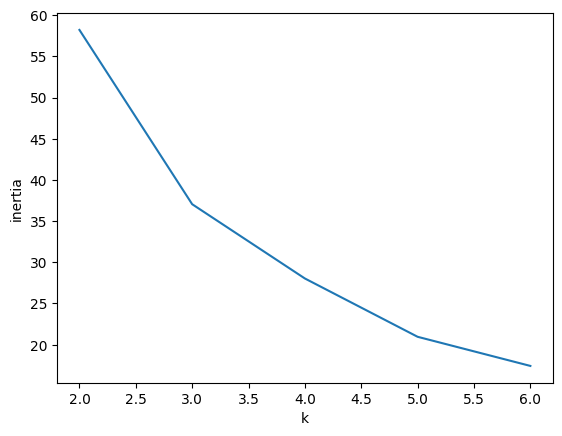

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_data)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()